In [1]:
# Library important for mathematical functions
import math
import random
import numpy as np
import matplotlib.pyplot as plt
# Library important for 3D plots
from mpl_toolkits.mplot3d import Axes3D
# Library appropriate for drawing 3D polygons
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
# Library important for specifying plot style
from matplotlib import style
# Library important for handling STL meshes
from stl import mesh
# Library important for visualization of STL files with PyVista
import pyvista as pv

In [2]:
# To ignore random warnings for various functions
import warnings
warnings.filterwarnings("ignore")

In [3]:
# This is the code to generate sets of random points of number of vertices 5 to 20 (5-20 is a range I have assumed)
# Define the range for each coordinate (x, y, z).
x_min, x_max = -50, 50  # Range of acceptable x values
y_min, y_max = -50, 50  # Adjust the range for the y-coordinate
z_min, z_max = -50, 50  # Adjust the range for the z-coordinate

# Generate and save random 3D points with integer coordinates for n ranging from 5 to 20.
for n in range(5, 21):
    # Generate random 3D points with integer coordinates within the specified ranges.
    random_points = np.array([[random.randint(x_min, x_max), random.randint(y_min, y_max), random.randint(z_min, z_max)] for _ in range(n)])
    
    # Define the filename for the text file (e.g., 'points_n.txt' where n is the number of points).
    filename = f'C:\\Users\\Dell\\Desktop\\Courses\\Sem_V\\CompAlgo\\Assignment_2\\Test_Cases\\points_{n}.txt'
    
    # Save the random points to a text file.
    np.savetxt(filename, random_points, fmt='%d', delimiter=' ')
    
    print(f'Saved {n} random points to {filename}')

Saved 5 random points to C:\Users\Dell\Desktop\Courses\Sem_V\CompAlgo\Assignment_2\Test_Cases\points_5.txt
Saved 6 random points to C:\Users\Dell\Desktop\Courses\Sem_V\CompAlgo\Assignment_2\Test_Cases\points_6.txt
Saved 7 random points to C:\Users\Dell\Desktop\Courses\Sem_V\CompAlgo\Assignment_2\Test_Cases\points_7.txt
Saved 8 random points to C:\Users\Dell\Desktop\Courses\Sem_V\CompAlgo\Assignment_2\Test_Cases\points_8.txt
Saved 9 random points to C:\Users\Dell\Desktop\Courses\Sem_V\CompAlgo\Assignment_2\Test_Cases\points_9.txt
Saved 10 random points to C:\Users\Dell\Desktop\Courses\Sem_V\CompAlgo\Assignment_2\Test_Cases\points_10.txt
Saved 11 random points to C:\Users\Dell\Desktop\Courses\Sem_V\CompAlgo\Assignment_2\Test_Cases\points_11.txt
Saved 12 random points to C:\Users\Dell\Desktop\Courses\Sem_V\CompAlgo\Assignment_2\Test_Cases\points_12.txt
Saved 13 random points to C:\Users\Dell\Desktop\Courses\Sem_V\CompAlgo\Assignment_2\Test_Cases\points_13.txt
Saved 14 random points to C:\

In [4]:
# This class represents a 3D vertex used in computational geometry algorithms.
class Vertex:
    # Initializes a vertex with x,y,z coordinates
    def __init__(self, x=0, y=0, z=0):
        self.x = x
        self.y = y
        self.z = z
    
    # Subtraction operator to determine the vector 
    # from self to the other
    def __sub__(self, other):
        x_ = self.x - other.x
        y_ = self.y - other.y
        z_ = self.z - other.z
        # Create new vertex representing the subtracted vector
        SubVertex = Vertex(x_, y_, z_)
        return SubVertex
    
    # Print magic function in python classes
    def __str__(self):
        return str(self.x)+" "+str(self.y)+" "+str(self.z)

In [5]:
# This class stores the indices of the three pointList it has
# Also contains the outward pointing normal
class Face:
    def __init__(self, p1, p2, p3, n):
        self.point1 = p1
        self.point2 = p2
        self.point3 = p3
        self.normal = n
    
    def __str__(self):
        return str(self.point1) + " " + str(self.point2) + " " + str(self.point3) + " " + str(self.normal)

In [6]:
# Calculates the dot product of 2 vectors passed as arguments
def dotProduct(v1, v2):
    value = v1.x*v2.x + v1.y*v2.y + v1.z*v2.z
    return value

# Calculates the cross product of 2 vectors passed as arguments
def crossProduct(v1, v2):
    val1 = v1.y*v2.z - v1.z*v2.y
    val2 = v1.z*v2.x - v1.x*v2.z
    val3 = v1.x*v2.y - v1.y*v2.x
    val = Vertex(val1, val2, val3)
    return val

# Subtraction of 2 vectors using the subtraction overloading
def subtract(v1, v2):
    return v1-v2

In [7]:
# Function to add a face to the face list of the Hull
# Takes three vertices as input
def addFace(a,b,c):
    # Generate the two vectors originating from the first input vertex
    v1 = subtract(pointList[c], pointList[a])
    v2 = subtract(pointList[b], pointList[a])
    
    # The normal is perpendicular to v1 and v2
    faceNormal = crossProduct(v1,v2)
    # Create a face with the given face vertices and normal
    face = Face(a,b,c,faceNormal)
    # Each face information is appended to the convexHull
    convexHull.append(face)
    insideHull[a][b] = insideHull[b][c] = insideHull[c][a] = True

# Function to remove a face from the face list of the hull
def removeFace(f):
    a = f.point1
    b = f.point2
    c = f.point3
    insideHull[a][b] = insideHull[b][c] = insideHull[c][a] = False

In [8]:
# Checking if or no the vertex is visible from the face
def isVisible(v, f):
    if(dotProduct(subtract(v, pointList[f.point1]), f.normal) > 0):
        return True
    return False

In [9]:
# Function to initialize the convex hull with the first three vertices
def beginHull():
    # Initial faces are created using the first three vertices
    addFace(0,1,2)
    addFace(0,2,1)

# Function to create the convex hull using the incremental algorithm
def createHull():
    # convexHull is a global variable
    global convexHull
    n = len(pointList)
    # Here, we are assuming that n>=3 for the rest of the code
    # Because atleast 3 points are required to create a convex hull
    beginHull()
    
    for i in range(3,n):
        # Create a list to store the temporary hull faces
        tempHull = []
        # Get the current number of faces in the hull
        hullSize = len(convexHull)
        
        # Check for each face in the hull
        for j in range(hullSize):
            # If the face is visible to the new point, remove it
            # because that point does no longer belong to the hull
            if(isVisible(pointList[i], convexHull[j])):
                removeFace(convexHull[j])
            else:
            # Otherwise just add it to the tempHull
                tempHull.append(convexHull[j])
        
        # Update the convexHull with the tempHull, thereby removing the possible non hull faces
        convexHull = tempHull
        hullSize = len(convexHull)
        
        # Check each face in the updated hull
        for j in range(hullSize):
            p1 = convexHull[j].point1
            p2 = convexHull[j].point2
            p3 = convexHull[j].point3
            
            # Check and add new faces, if edges are not already in the hull
            if not insideHull[p2][p1]:
                addFace(p2, p1, i)
            
            if not insideHull[p3][p2]:
                addFace(p3, p2, i)
            
            if not insideHull[p1][p3]:
                addFace(p1, p3, i)

In [10]:
def create_STL(n):
    # Create an STL mesh
    convex_hull_mesh = mesh.Mesh(np.zeros(len(convexHull), dtype=mesh.Mesh.dtype))

    # Set vertices and normals for each face
    for i, face in enumerate(convexHull):
        convex_hull_mesh.vectors[i] = [
            [pointList[face.point1].x, pointList[face.point1].y, pointList[face.point1].z],
            [pointList[face.point2].x, pointList[face.point2].y, pointList[face.point2].z],
            [pointList[face.point3].x, pointList[face.point3].y, pointList[face.point3].z]
        ]

    # Save the mesh to an STL file
    filename = f"C:\\Users\\Dell\\Desktop\\Courses\\Sem_V\\CompAlgo\\Assignment_2\\STL_files\\ConvexHull{n}.stl"
    convex_hull_mesh.save(filename)
    

In [11]:
def plot(vertices,k):
    # Create a 3D plot
    fig = plt.figure(figsize=(14,7))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the 3D points
    ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], c='blue', marker='o', label="Vertices")

    # Set axis labels
    ax.set_xlabel('X_Coordinates')
    ax.set_ylabel('Y_Coordinates')
    ax.set_zlabel('Z_Coordinates')
    
    # Set title and other properties of plot
    plt.title("Plot of given 3D points for {} vertices".format(k))
    plt.legend()
    
    ax.grid(True, linestyle='--', alpha=0.6)

    ax.w_xaxis.set_pane_color((0.8, 0.8, 0.8, 1.0))
    ax.w_yaxis.set_pane_color((0.8, 0.8, 0.8, 1.0))
    ax.w_zaxis.set_pane_color((0.8, 0.8, 0.8, 1.0))
    
    # Show the 3D plot
    plt.show()

In [12]:
def plane_plot(k):
    global convexHull
    
    # Create a 3D plot
    fig = plt.figure(figsize=(14,7))
    ax = fig.add_subplot(111,projection='3d')
    
    # Iterate over each face of the convex Hull
    for i in range(len(convexHull)):
        # Find each triangle face, which is there in convex hull
        triangle = [vertices[convexHull[i].point1], vertices[convexHull[i].point2], vertices[convexHull[i].point3]]
        x1 = np.array([triangle[0][0], triangle[1][0], triangle[2][0]])
        y1 = np.array([triangle[0][1], triangle[1][1], triangle[2][1]])
        z1 = np.array([triangle[0][2], triangle[1][2], triangle[2][2]])
        
        # Firstly plot the points of the triangle
        ax.scatter(x1, y1, z1, c='blue', marker='o', label='Vertices')
        
        # 1. create vertices from points
        verts = [list(zip(x1, y1, z1))]
        
        # Join the vertices with lines
        ax.plot([triangle[0][0], triangle[1][0], triangle[2][0], triangle[0][0]],
                [triangle[0][1], triangle[1][1], triangle[2][1], triangle[0][1]],
                [triangle[0][2], triangle[1][2], triangle[2][2], triangle[0][2]], 'b--', c="black", label="edges")
        
        # 2. create 3d polygons and specify parameters
        srf = Poly3DCollection(verts, alpha=.6, facecolor='darkgreen')
        
        # 3. add polygon to the figure (current axes)
        plt.gca().add_collection3d(srf)

    # Add all other required properties for plotting
    ax.set_xlabel('X_Coordinates')
    ax.set_ylabel('Y_Coordinates')
    ax.set_zlabel('Z_Coordinates')
    plt.title('3D Convex Hull for given input of {} vertices'.format(k), fontsize=14)
    
    ax.grid(True, linestyle='--', alpha=0.6)

    ax.w_xaxis.set_pane_color((0.8, 0.8, 0.8, 1.0))
    ax.w_yaxis.set_pane_color((0.8, 0.8, 0.8, 1.0))
    ax.w_zaxis.set_pane_color((0.8, 0.8, 0.8, 1.0))
    
    plt.show()

In [13]:
def load_vertices(n):
    # Define a list to store the loaded vertices.
    loaded_vertices = []

    # Load vertices from text files given n range is from 5 to 20 (because only generated these valued vertices)
    # Define the filename for the text file (e.g., 'points_n.txt' where n is the number of points).
    filename = f'C:\\Users\\Dell\\Desktop\\Courses\\Sem_V\\CompAlgo\\Assignment_2\\Test_Cases\\points_{n}.txt'

    # Load the vertices from the text file into a NumPy array.
    vertices = np.loadtxt(filename, dtype=int)
    
    return vertices

The number of input points is 5


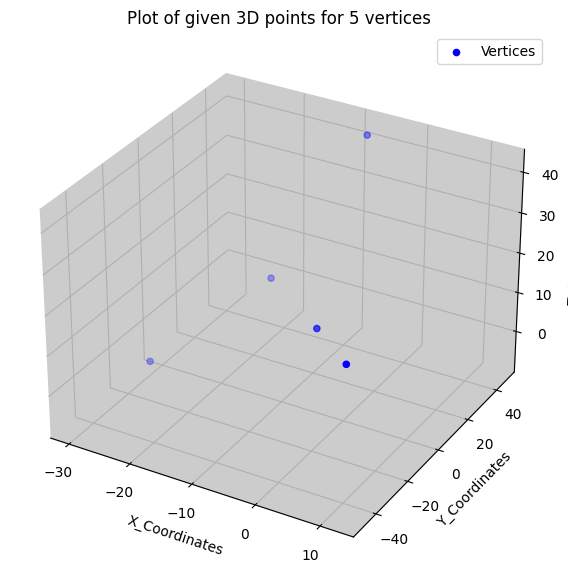

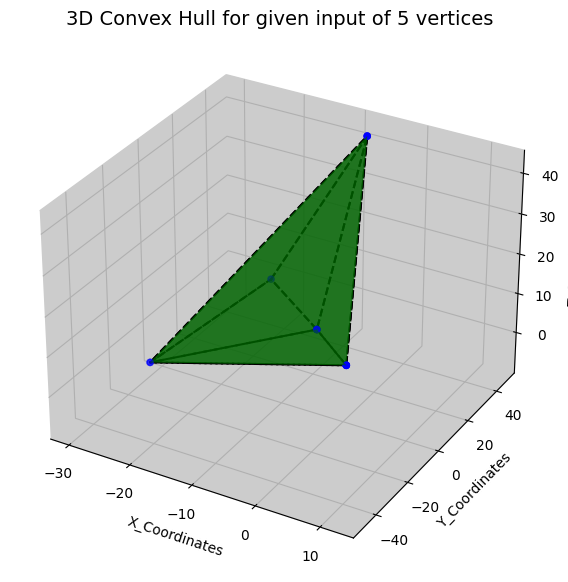

STL file representation


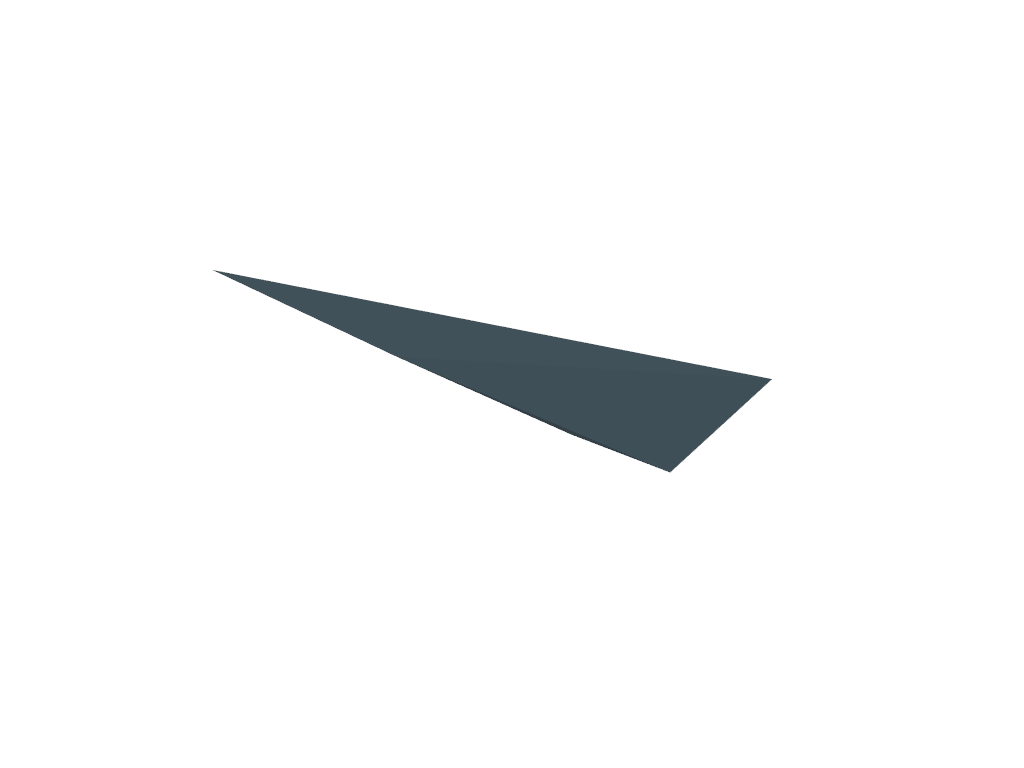

-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------
The number of input points is 6


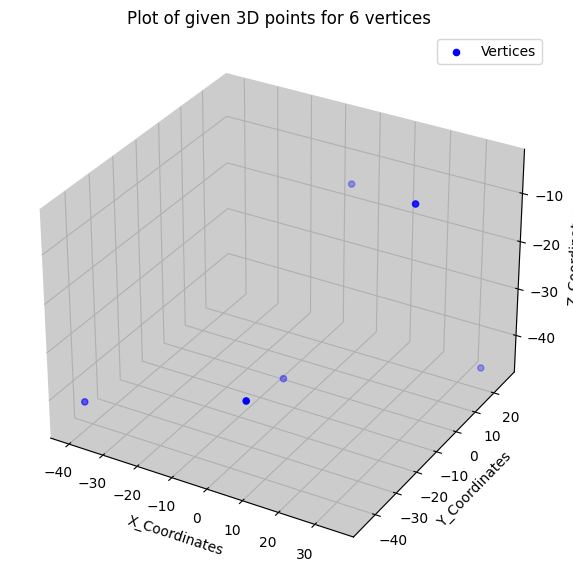

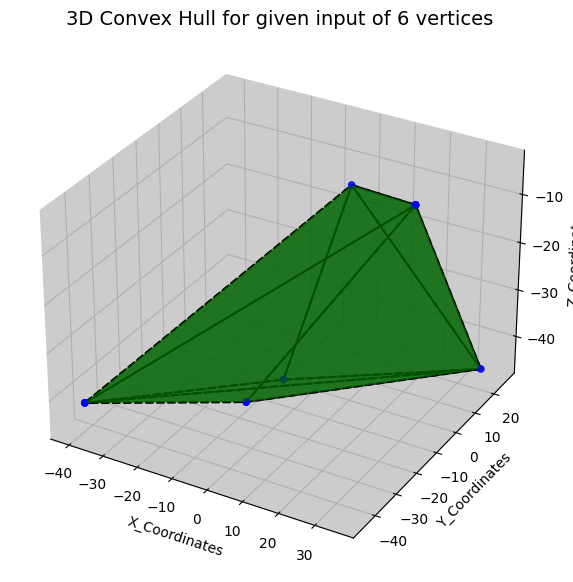

STL file representation


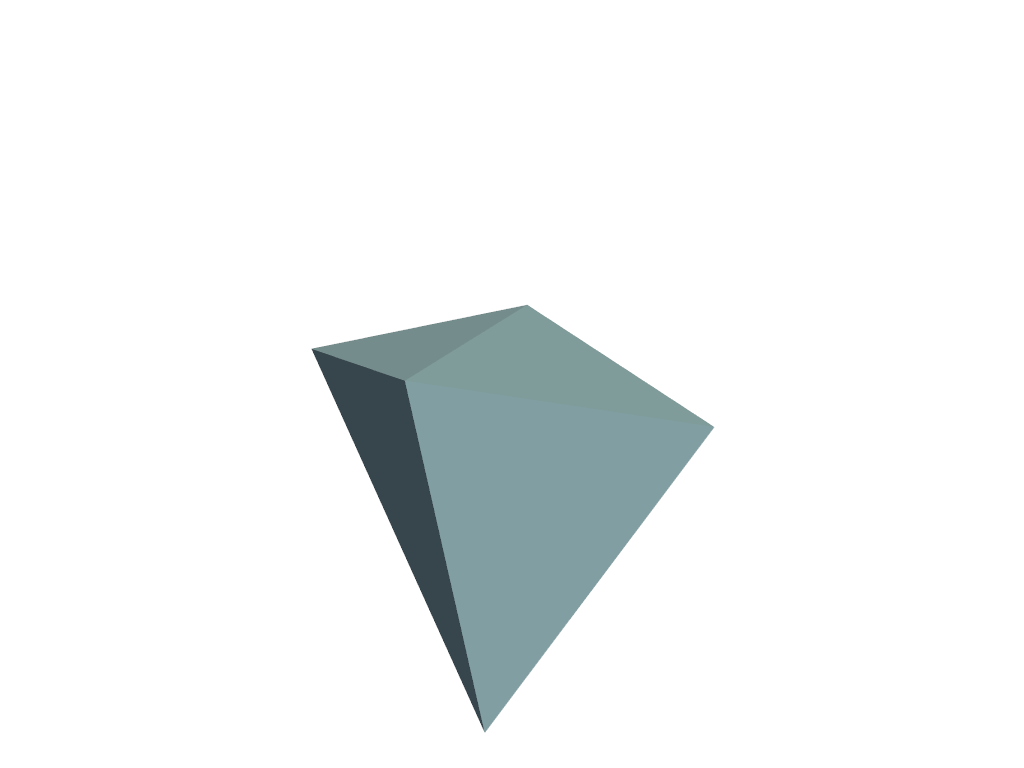

-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------
The number of input points is 7


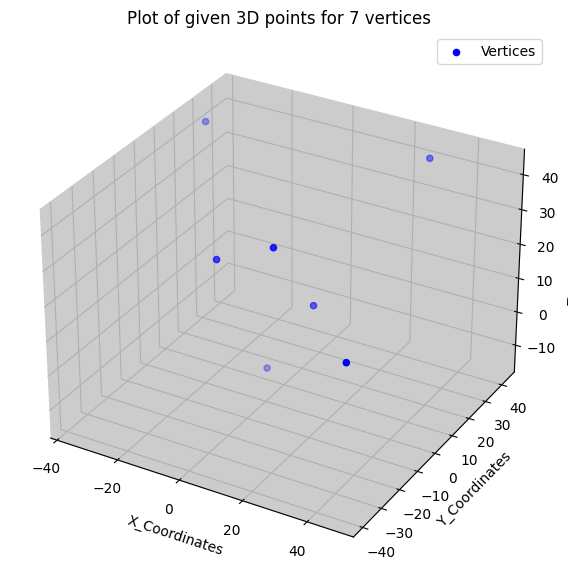

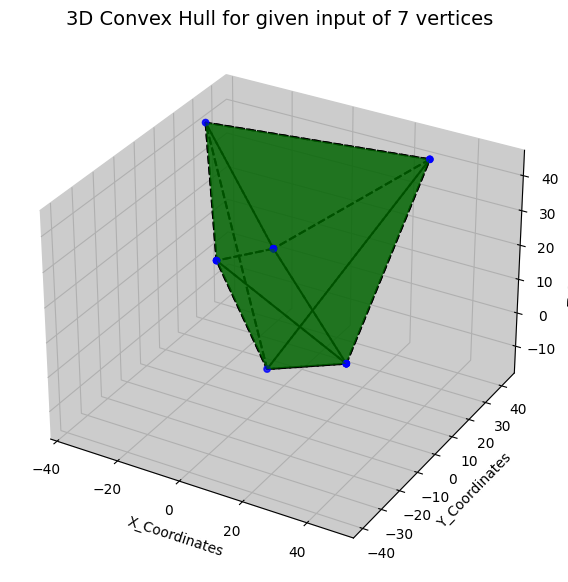

STL file representation


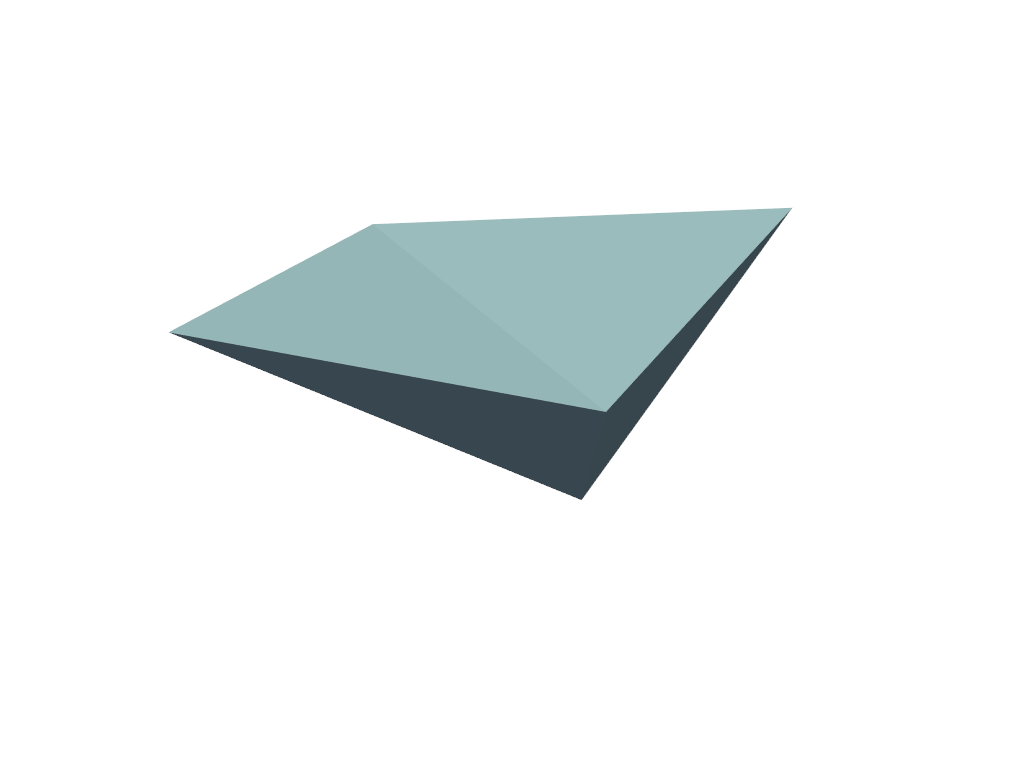

-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------
The number of input points is 8


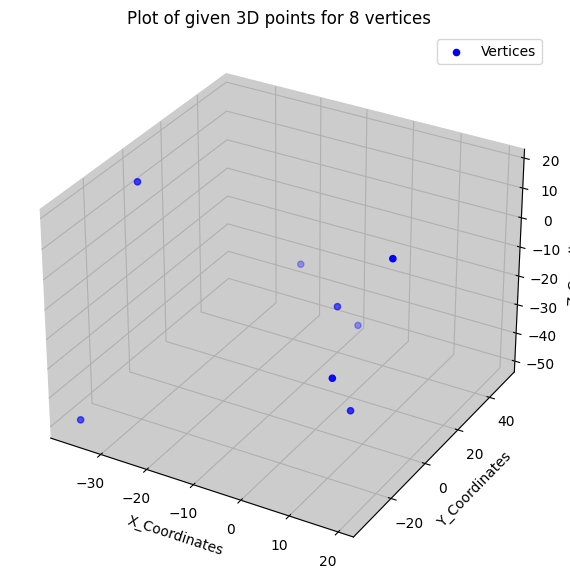

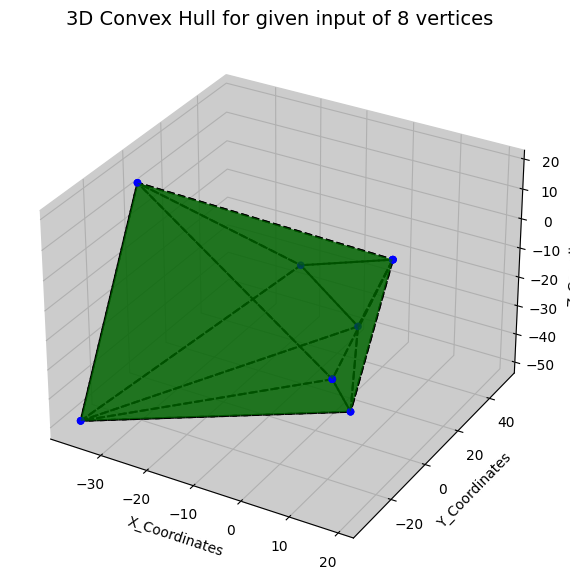

STL file representation


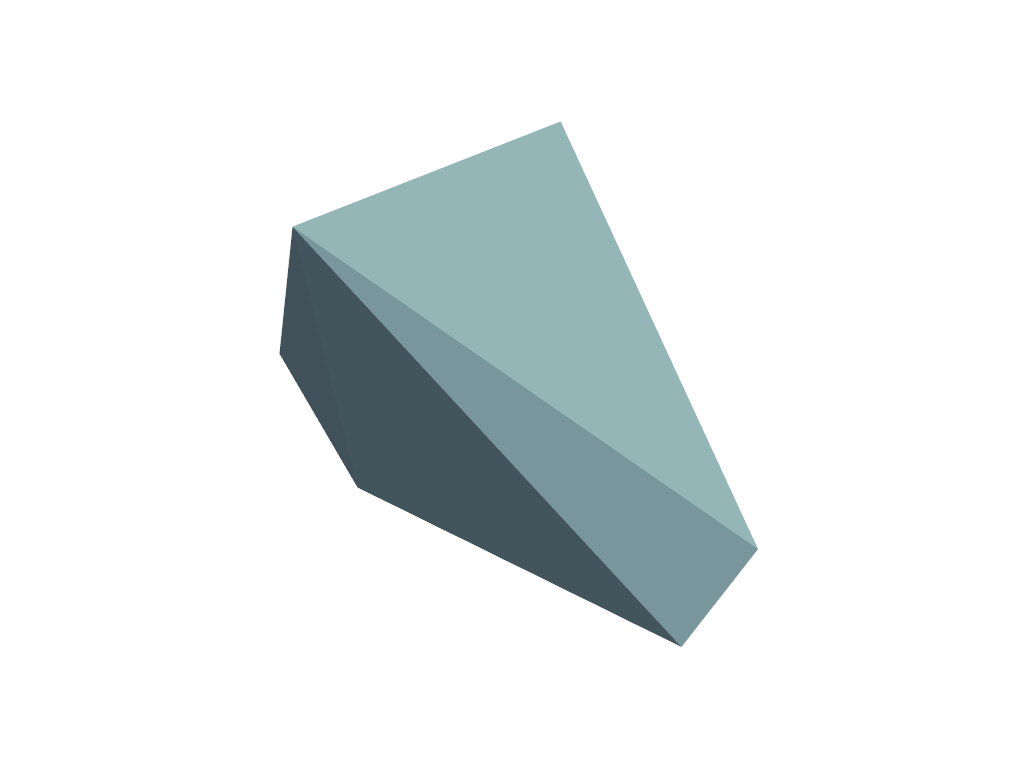

-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------
The number of input points is 9


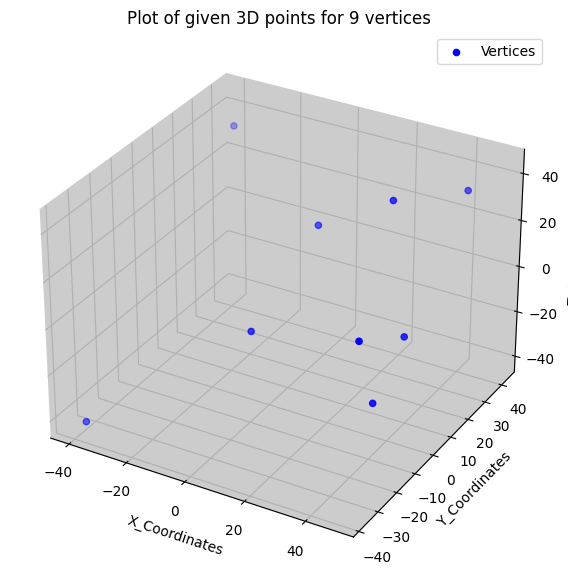

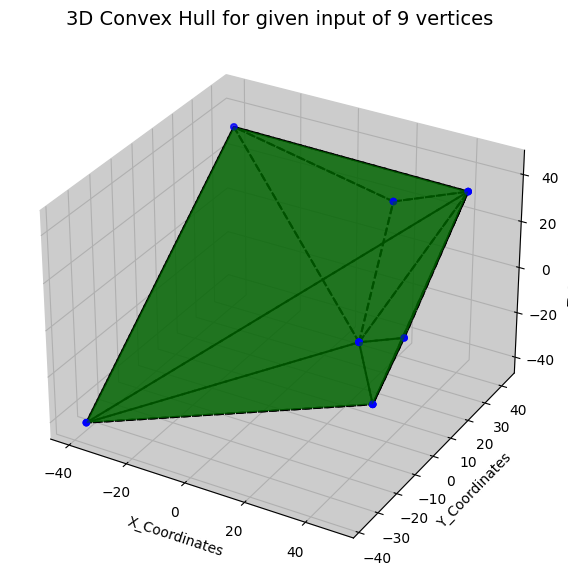

STL file representation


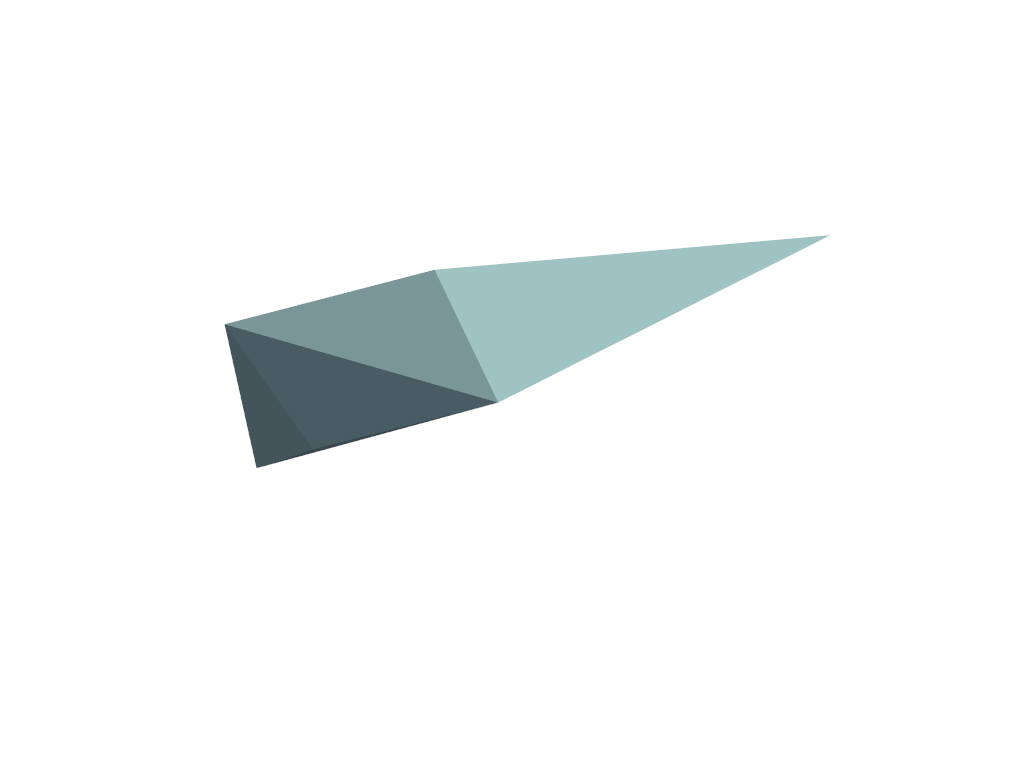

-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------
The number of input points is 10


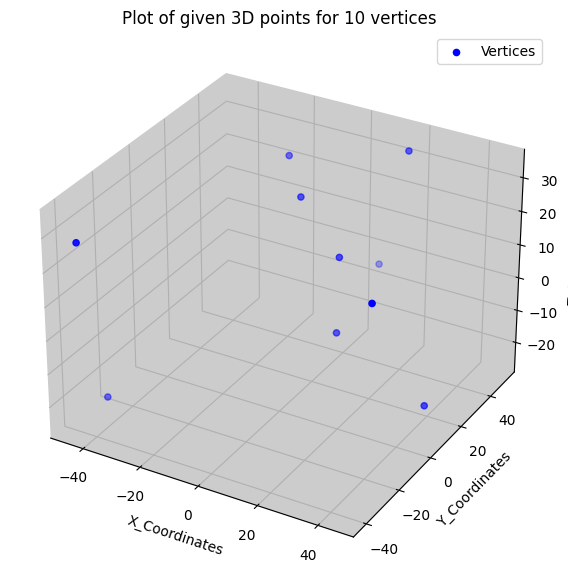

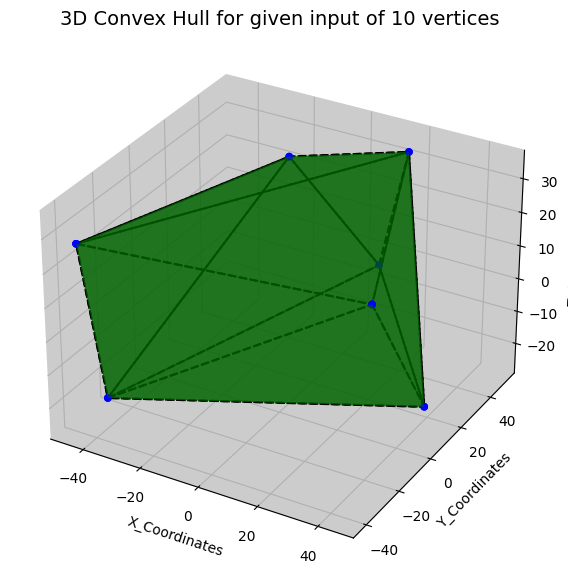

STL file representation


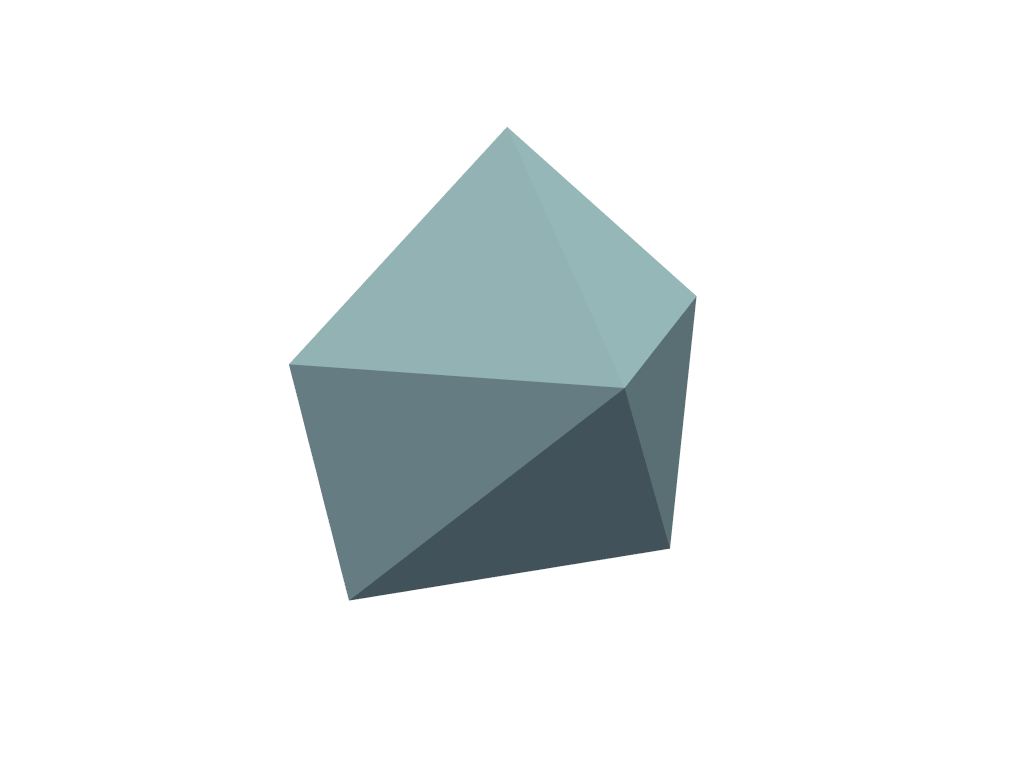

-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------
The number of input points is 11


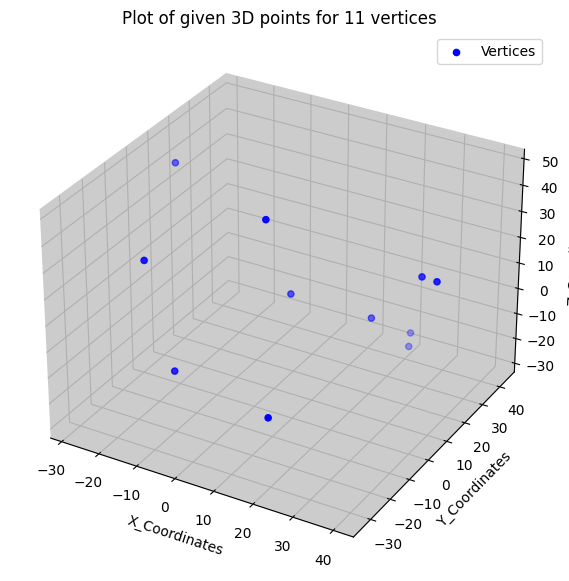

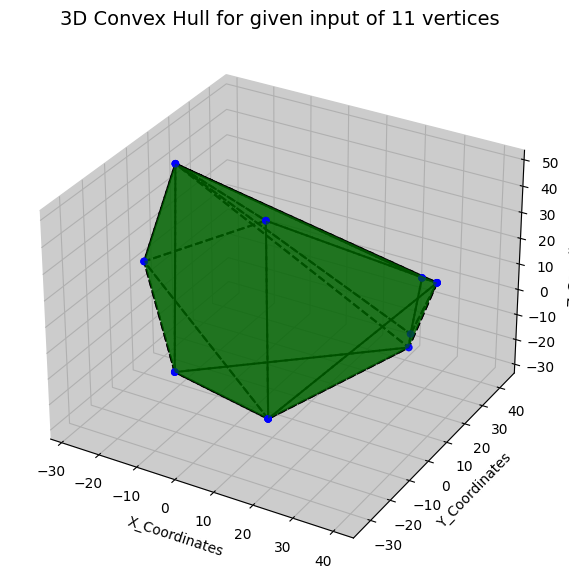

STL file representation


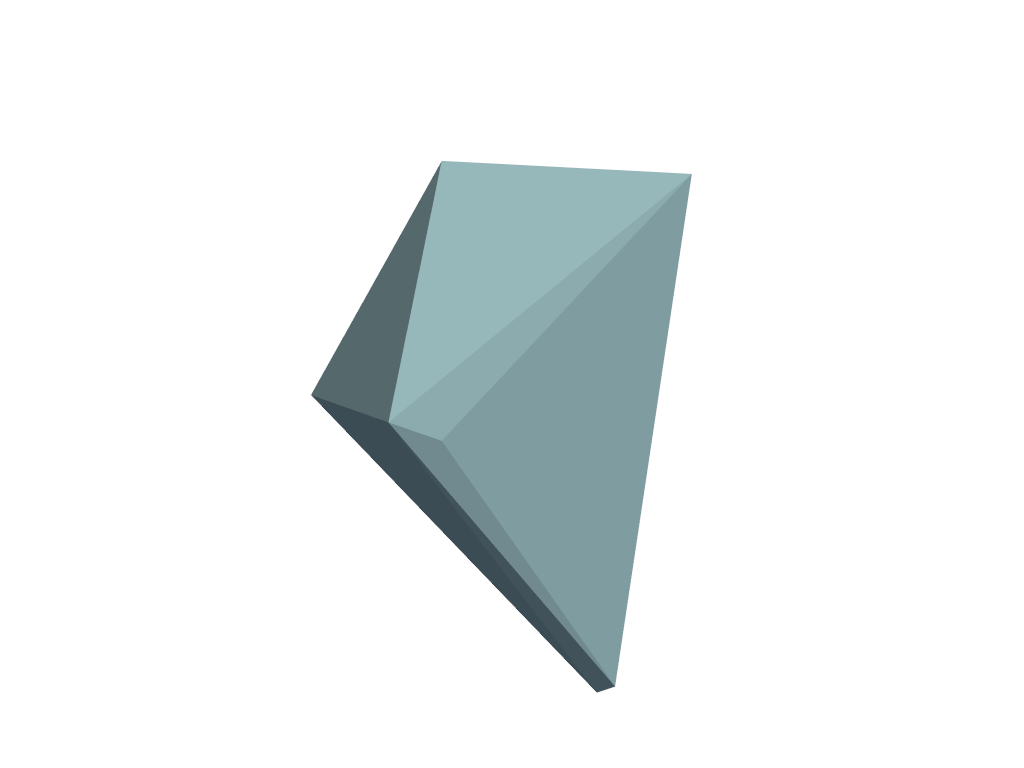

-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------
The number of input points is 12


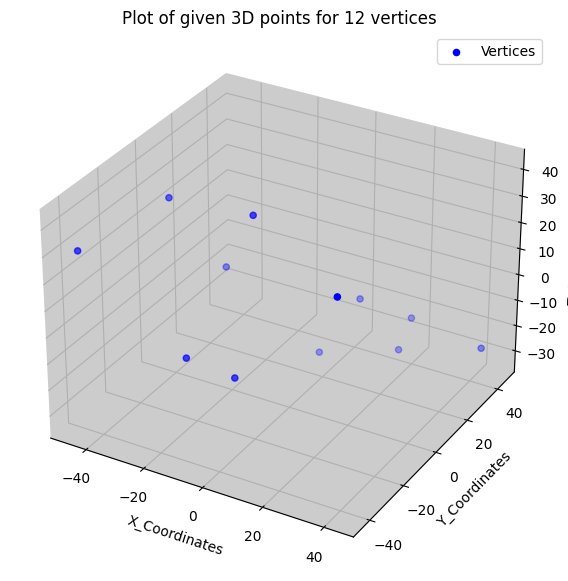

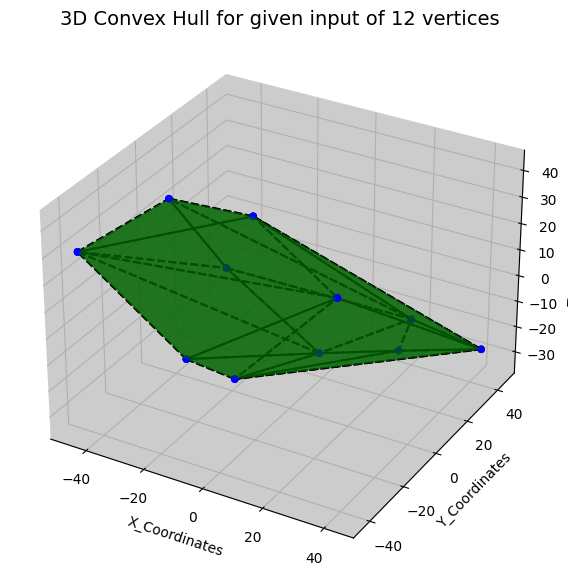

STL file representation


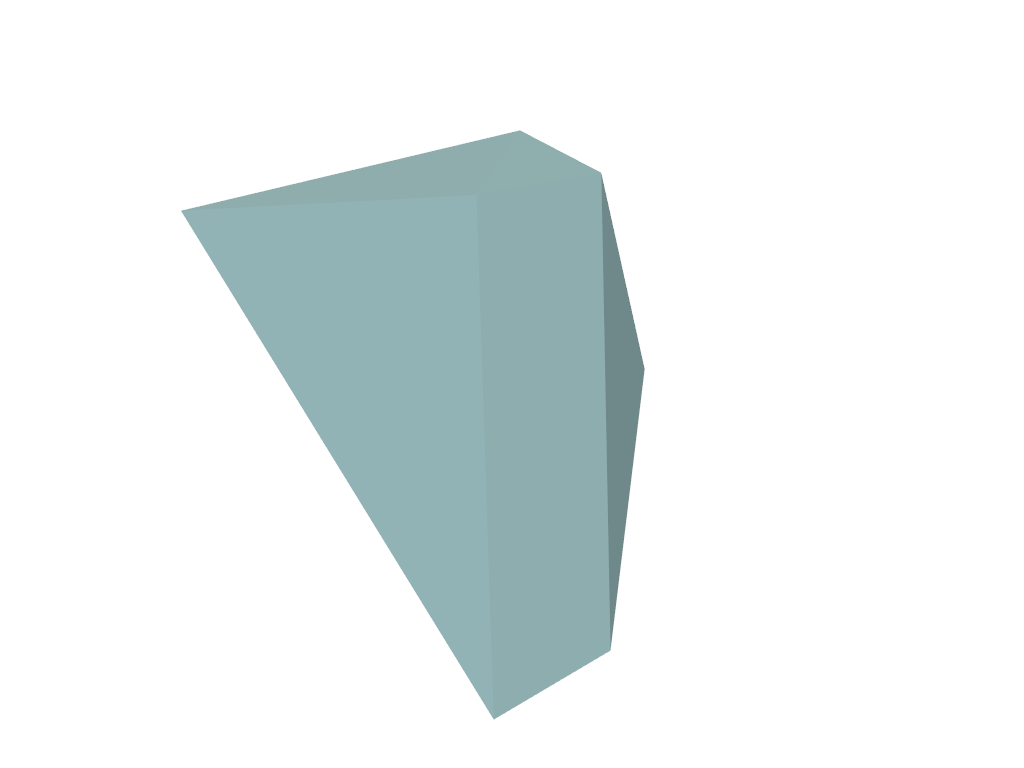

-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------
The number of input points is 13


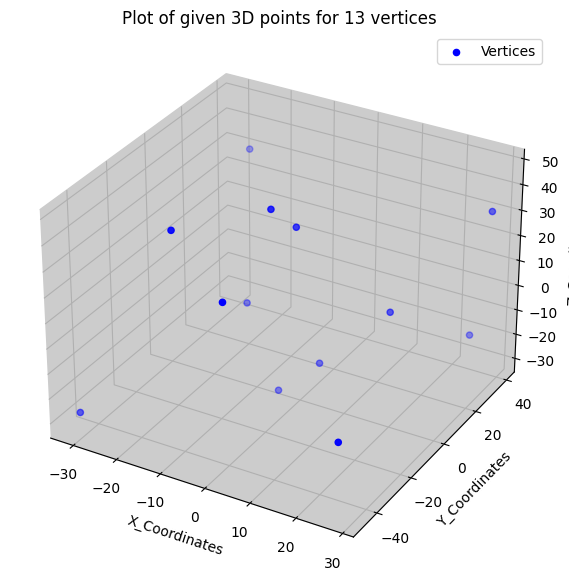

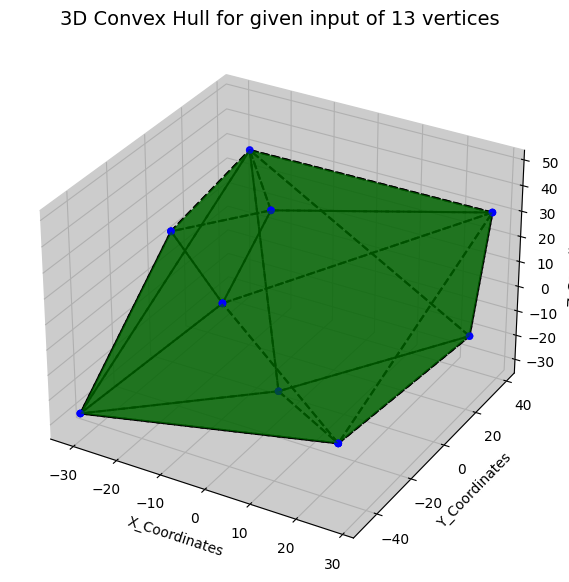

STL file representation


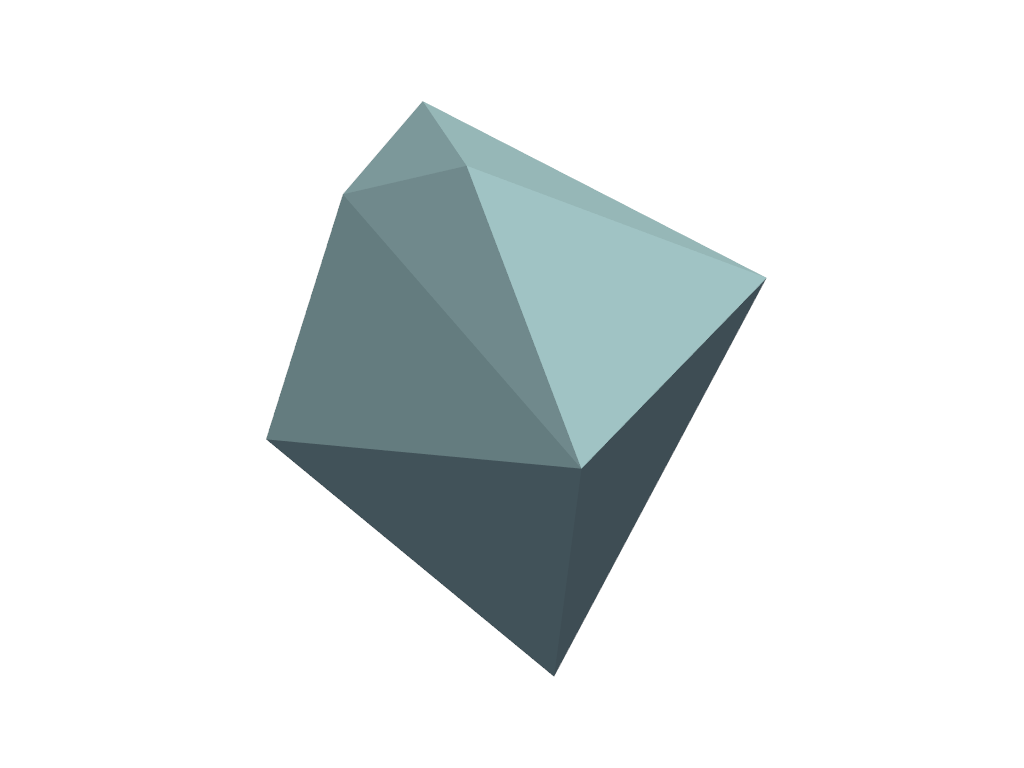

-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------
The number of input points is 14


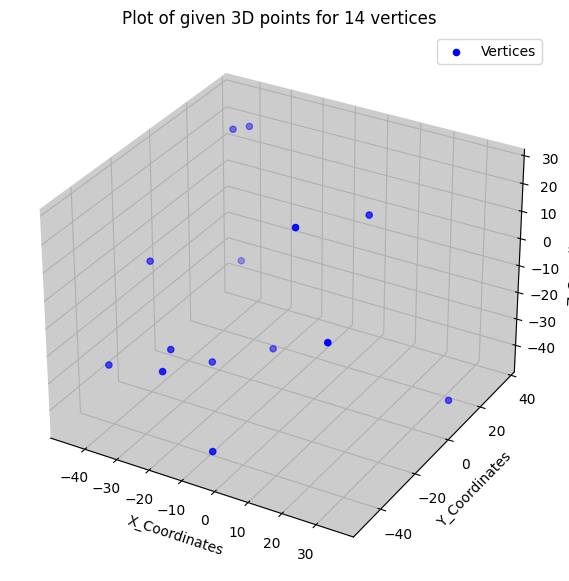

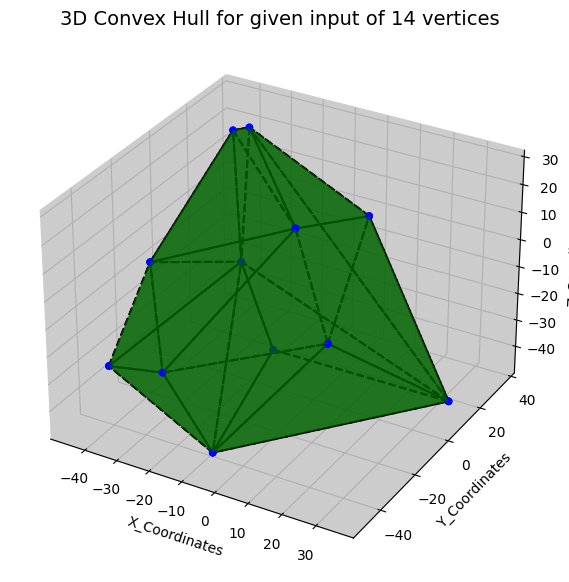

STL file representation


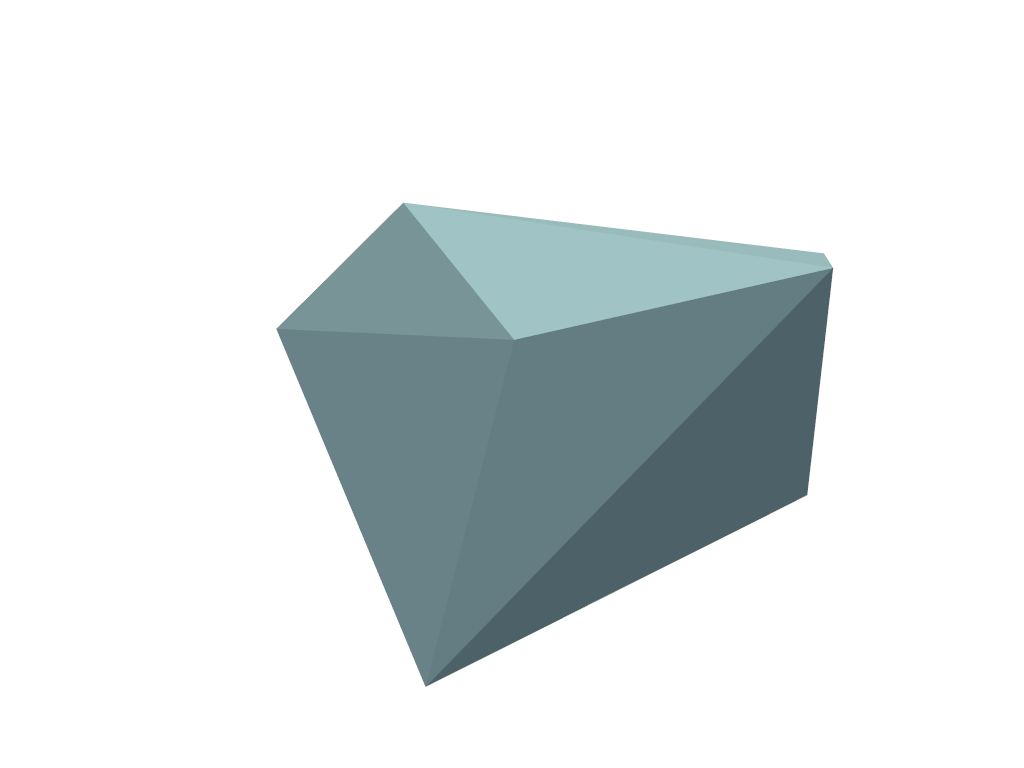

-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------
The number of input points is 15


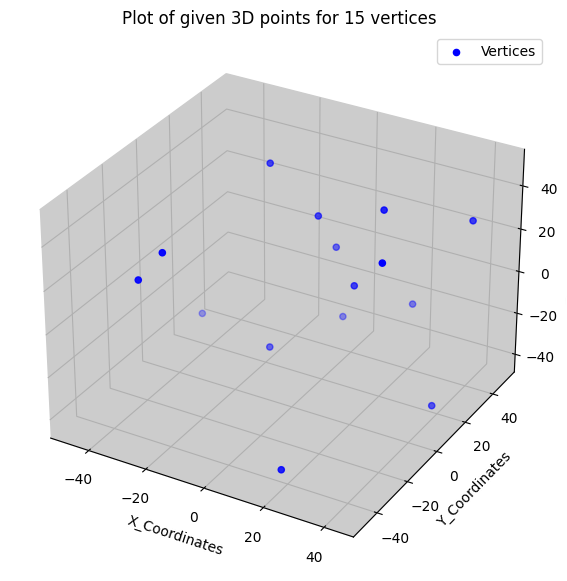

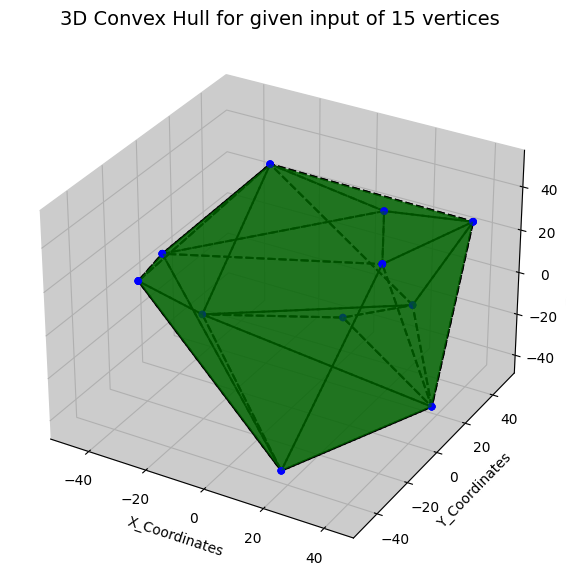

STL file representation


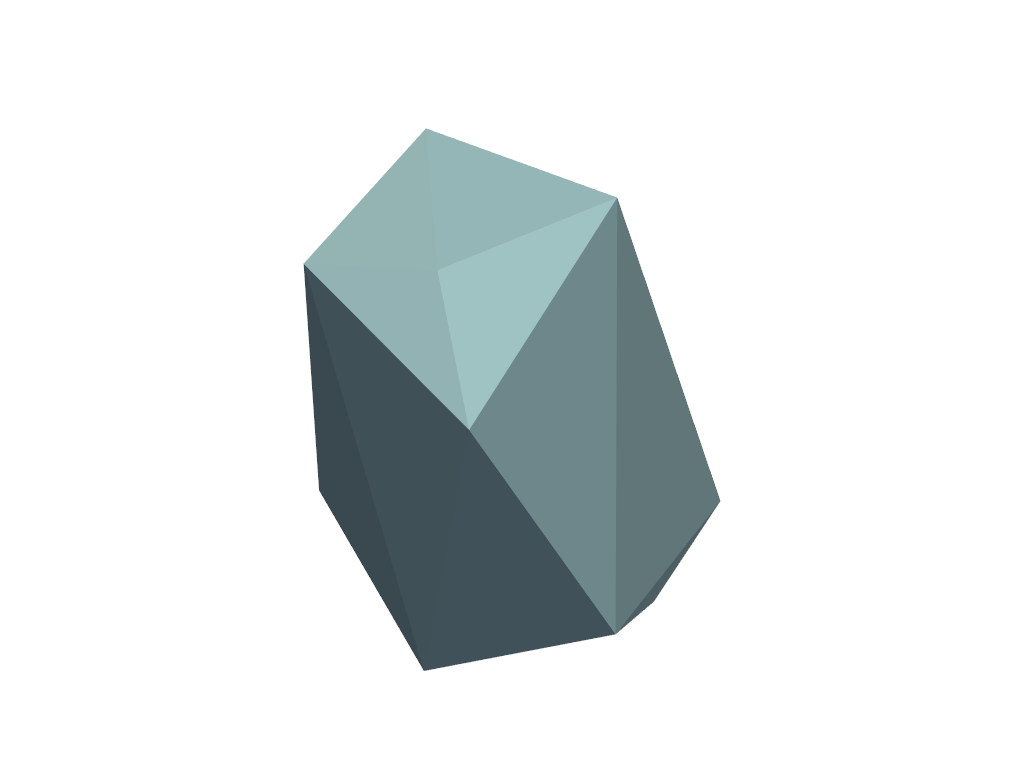

-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------
The number of input points is 16


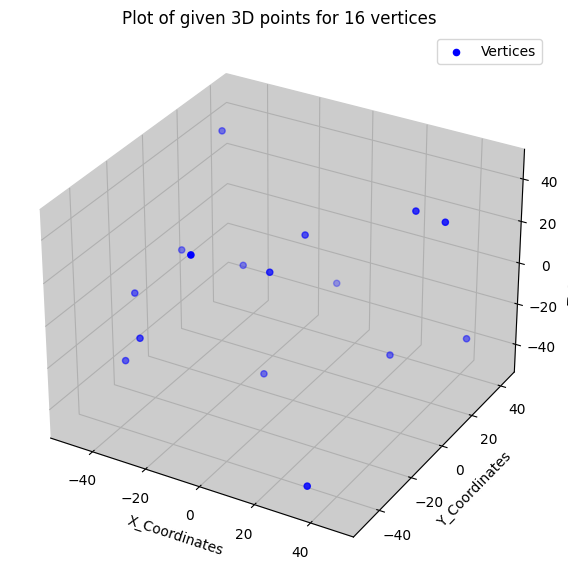

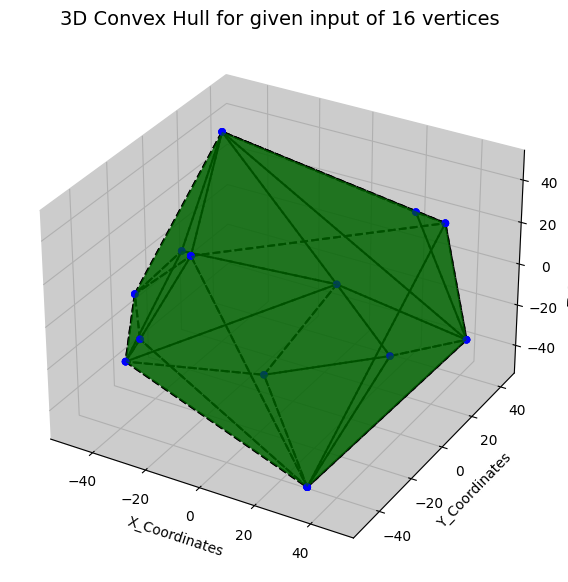

STL file representation


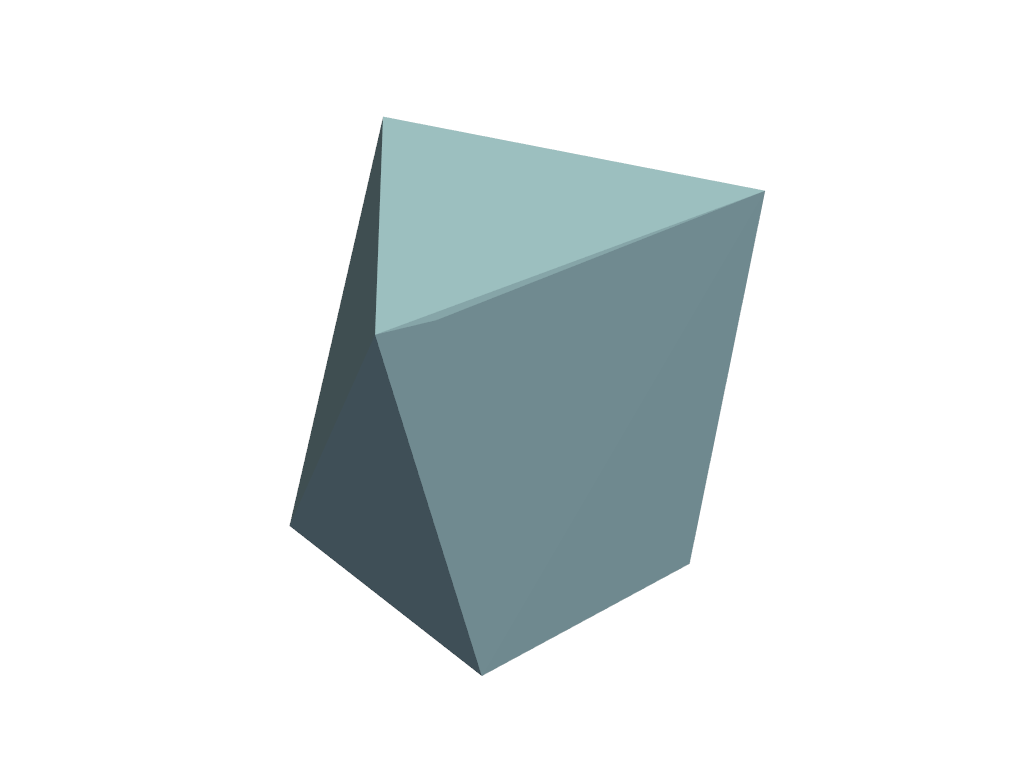

-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------
The number of input points is 17


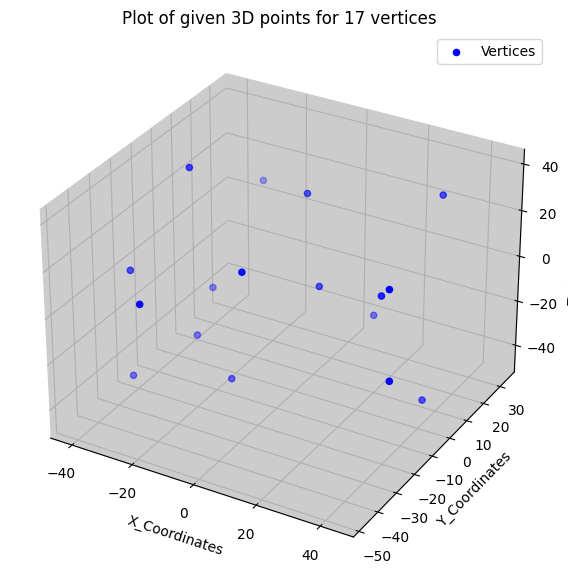

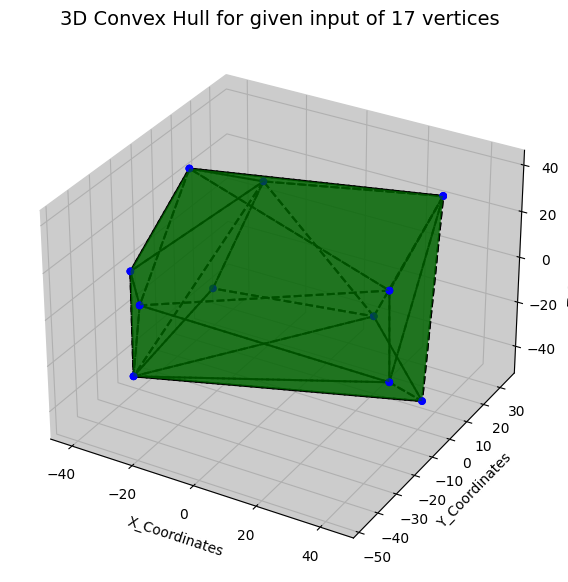

STL file representation


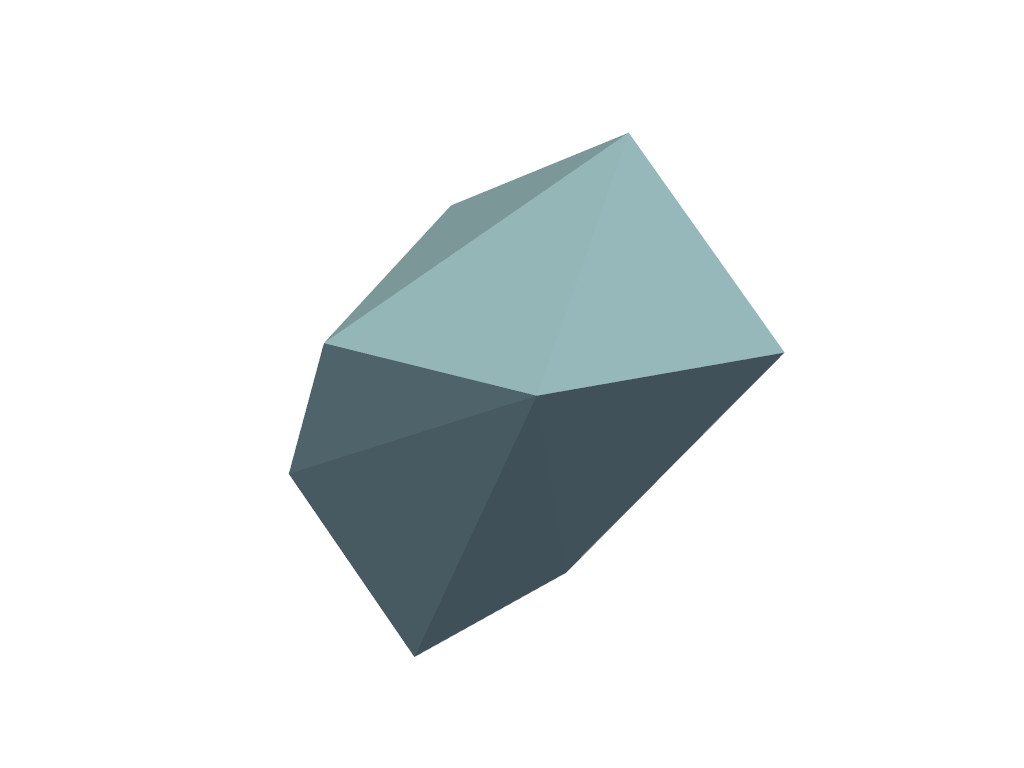

-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------
The number of input points is 18


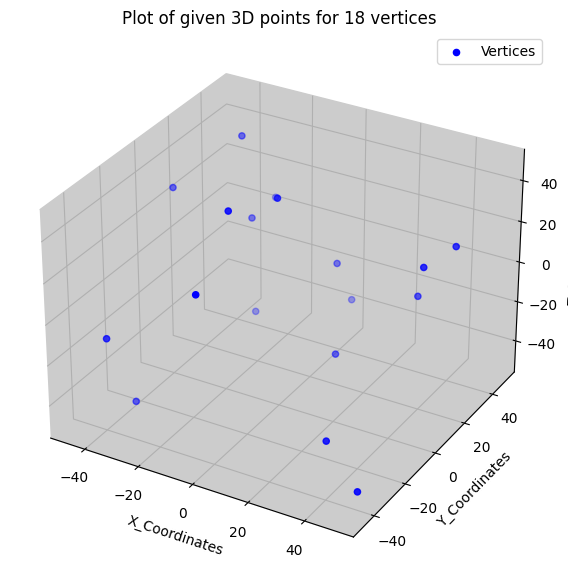

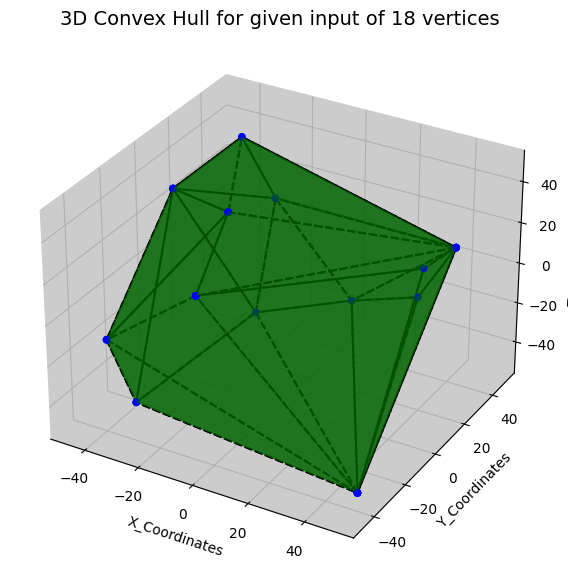

STL file representation


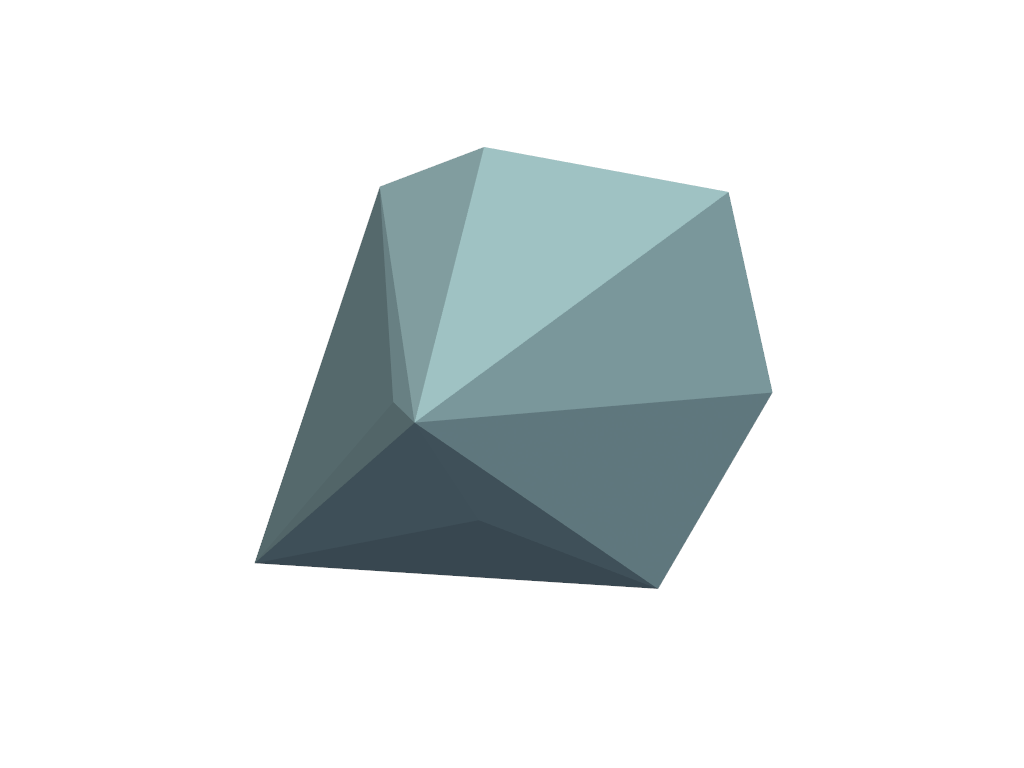

-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------
The number of input points is 19


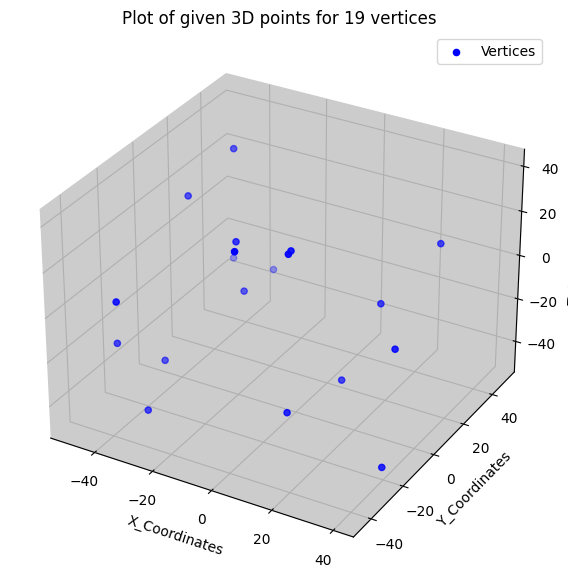

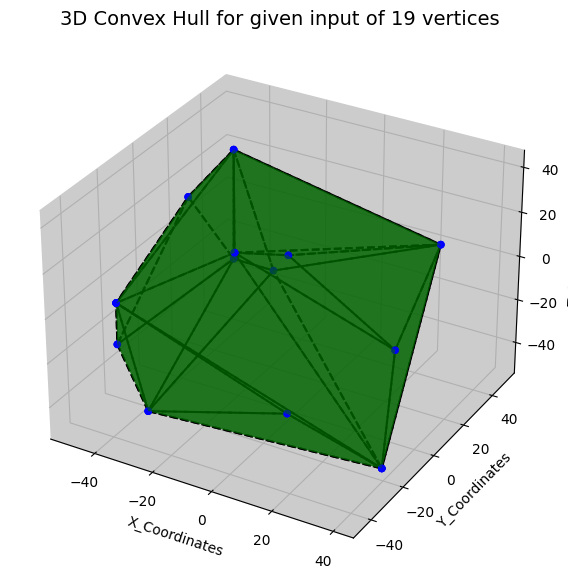

STL file representation


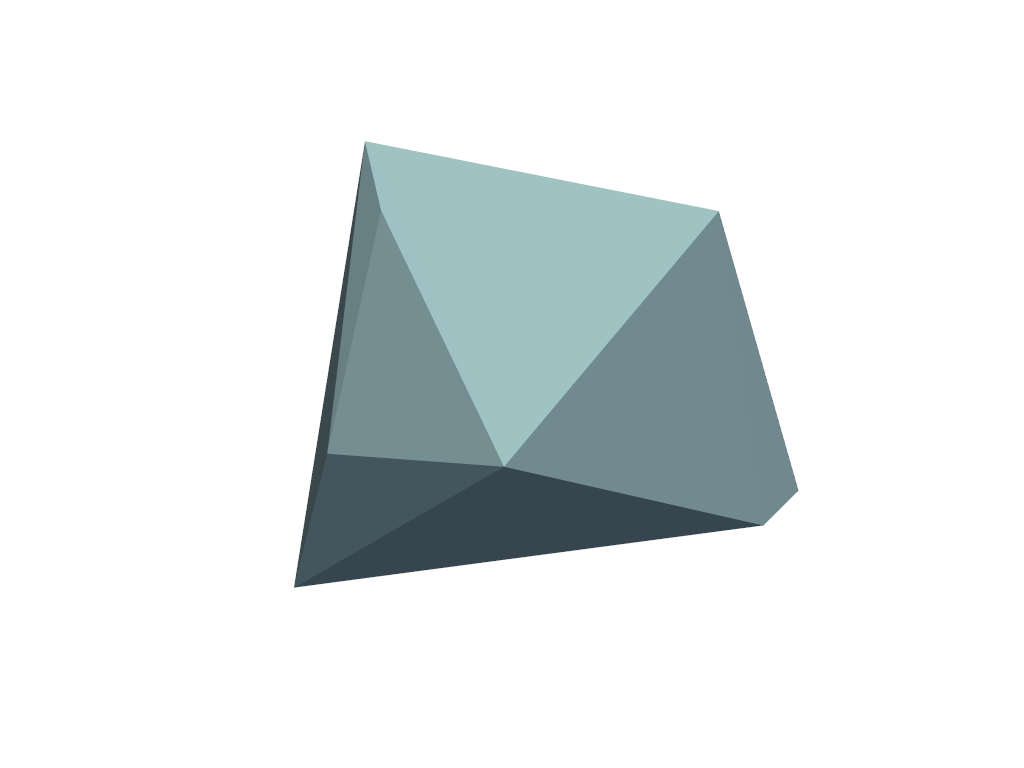

-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------
The number of input points is 20


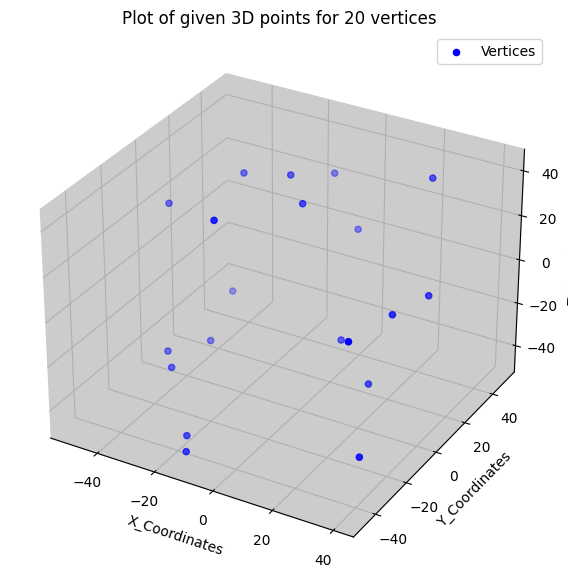

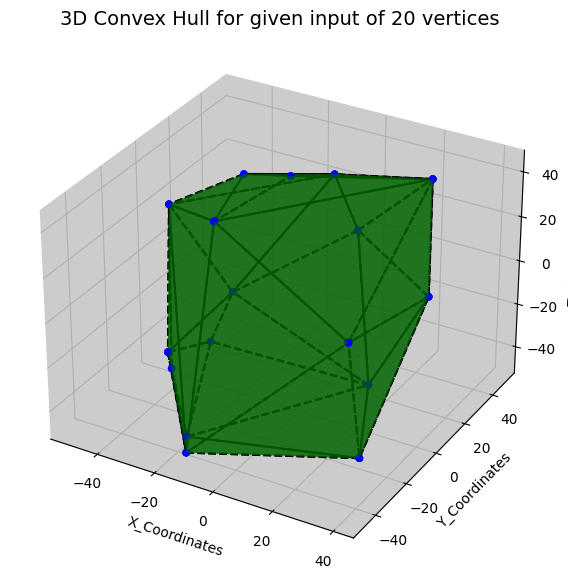

STL file representation


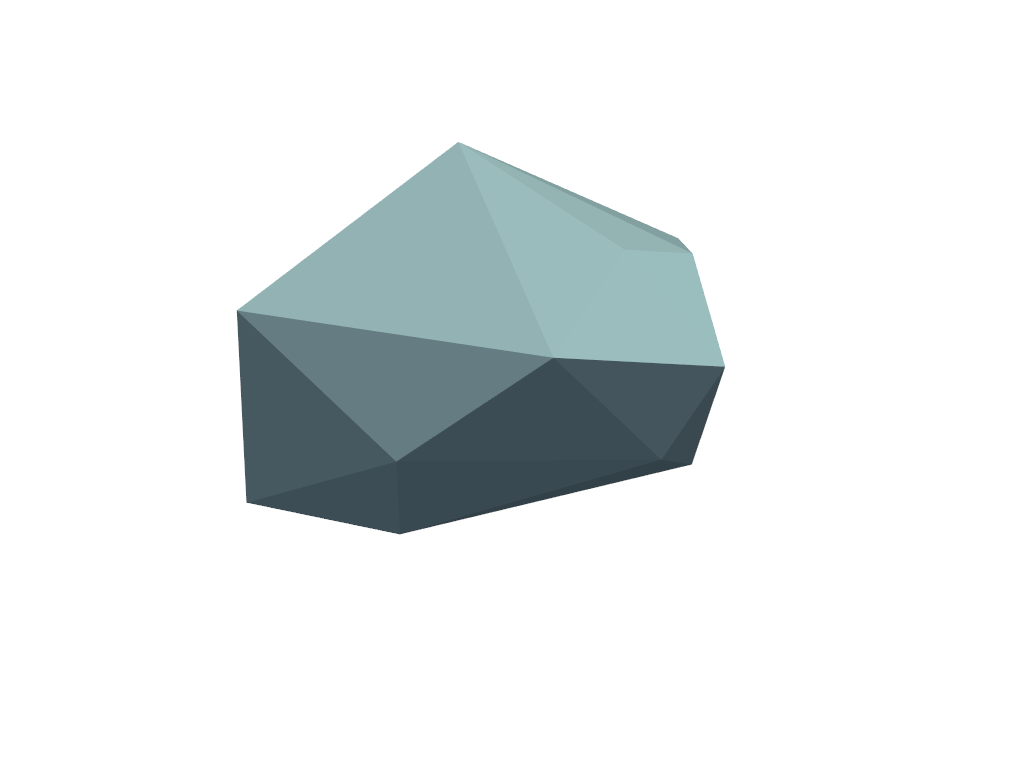

-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------


In [14]:
for k in range(5,21):
    print("The number of input points is",k)
    # Store the vertices from the txt file that has been generated and stored
    vertices = load_vertices(k)
    
    n = len(vertices)
    # pointlist is list of instances of class Vertex
    pointList = [Vertex() for i in range(n)]
    # Take in the input points
    for i in range(len(vertices)):
        pointList[i].x = vertices[i][0]
        pointList[i].y = vertices[i][1]
        pointList[i].z = vertices[i][2]
#         vertices.append([random_points[i][0], random_points[i][1], random_points[i][2]])

    # Plot the vertrxes to display the input coordinates
    plot(vertices,k)

    # Initialize insideHull as a 2D list to trach edges inside the hull
    insideHull = [[False for x in range(n)] for x in range(n)]

    # Initialize convexHull to empty list.
    # It will be storing the face coordinates that form the convex hull
    convexHull = []
    # Call the createHull function to find the convex hull of points
    createHull()
    hullSize = len(convexHull)     

    # Plot the convex hull using 3D plotting
    plane_plot(k)

    # We call the create_STL function to create an STL file of the convex hull
    create_STL(k)

    # Load the STL file
    mesh_ = pv.read('C:\\Users\\Dell\\Desktop\\Courses\\Sem_V\\CompAlgo\\Assignment_2\\STL_files\\ConvexHull{}.stl'.format(k))

    # Create a PyVista plotter
    plotter = pv.Plotter()

    # Add the mesh to the plotter
    plotter.add_mesh(mesh_)

    # Display the mesh
    print("STL file representation")
    plotter.show()
    
    print("-------------------------------------------------------------------------------------------------------------------")
    print("-------------------------------------------------------------------------------------------------------------------")